# Predicting App's success using ML
#### Dataset contains 
 - App:Name of the app
 - Category:Category in which the app lies.There are 35 categories
 - Rating:Users rating
 - Reviews:Users review
 - Size:Size of app
 - Installs:No. of times app has been downloaded
 - Type:Type of app.There are two types:Free & Paid 
 - Price:Price of app
 - Content Rating:There are 6 types namely:'Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated'
 - Genres:Genre of app
 - Last Updated:Last Updated
 - Current Ver:Current version pf app
 - Android Ver:Andriod version of app

In [149]:
import numpy as np
import pandas as pd
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [150]:
import cufflinks as cf
import plotly.plotly as py
from plotly.offline import download_plotlyjs,plot,iplot,init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline()

In [151]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [152]:
df = pd.read_csv('googleplaystore.csv')

In [153]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [154]:
null_columns = df.columns[df.isnull().any()]
df[df.isnull().any(axis=1)][null_columns].head()

,Rating,Type,Content Rating,Current Ver,Android Ver
15,3.2,Free,Everyone,NaN,4.2 and up
23,NaN,Free,Everyone,1.0.0,4.1 and up
113,NaN,Free,Everyone 10+,8.0,3.0 and up
123,NaN,Free,Everyone,1.3,4.1 and up
126,NaN,Free,Teen,1.15,4.1 and up


In [155]:
df.iloc[10472:10473,5:6]=str('0')

In [156]:
df['Installs'] = df['Installs'].apply(lambda x: int(''.join(list(map(str,filter(str.isdigit,x))))))

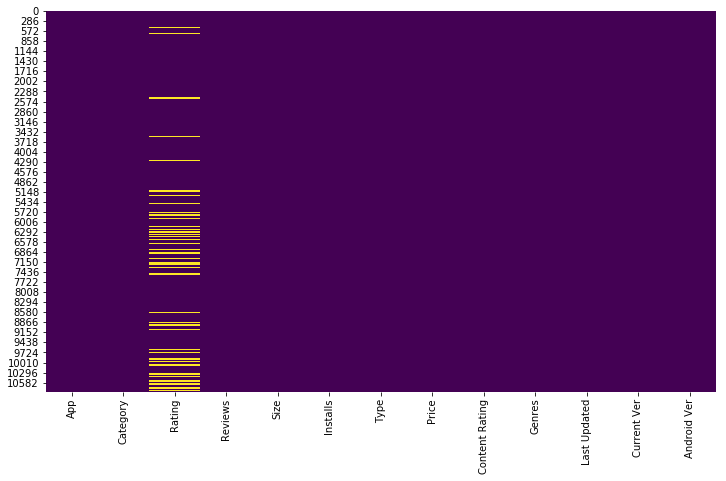

In [157]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [158]:
df.isna()[df.columns].sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

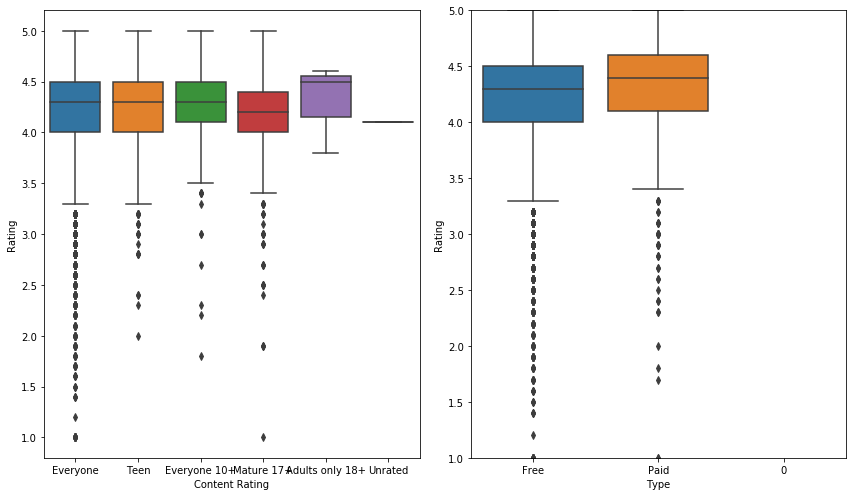

In [159]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,7))
sns.boxplot(data=df,y='Rating',x='Content Rating',ax=axes[0])
sns.boxplot(data=df,y='Rating',x='Type',ax=axes[1])
axes[1].set_ylim(1.0,5.0)
plt.tight_layout()

In [160]:
def impute(cols):
    rating = cols[0]
    content_rating = cols[1]
    if pd.isnull(rating):
        if content_rating == 'Everyone':
            return 4.3
        elif content_rating == 'Teen':
            return 4.3            
        elif content_rating == 'Everyone 10+':
            return 4.3        
        elif content_rating == 'Mature 17+':
            return 4.2        
        elif content_rating == 'Adults Only 18+':
            return 4.5
        elif content_rating == 'Unrated':
            return 4.0    
        
    else:
        return rating
        
df['Rating'] = df[['Rating','Content Rating']].apply(impute,axis=1)                 
        
        

In [161]:
df = df.dropna(subset=['Content Rating','Type'])

In [162]:
#modifying price feature into type(float)

df['Price'] = list(map(float,df['Price'].apply(lambda x: x.replace('$','').strip())))

In [163]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [164]:
#Label-encoding of th 'Category' column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [305]:
df_appsize_predict = df.drop(['App','Type','Content Rating','Genres','Last Updated','Current Ver','Android Ver'],
                             axis=1)
Type = pd.get_dummies(df['Type'],drop_first=True)
Content_rating = pd.get_dummies(df['Content Rating'],drop_first=True)
df_appsize_predict = pd.concat([df_appsize_predict,Type,Content_rating],axis=1)
df_appsize_predict['Reviews'] = df_appsize_predict['Reviews'].astype(int)
df_appsize_predict.head()

,Category,Rating,Reviews,Size,Installs,Price,Paid,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,0,4.1,159,19M,10000,0.0,0,1,0,0,0,0
1,0,3.9,967,14M,500000,0.0,0,1,0,0,0,0
2,0,4.7,87510,8.7M,5000000,0.0,0,1,0,0,0,0
3,0,4.5,215644,25M,50000000,0.0,0,0,0,0,1,0
4,0,4.3,967,2.8M,100000,0.0,0,1,0,0,0,0


In [306]:
def byte_convert(x):
    x = x.replace("k","00")
    x = x.replace("M","00000")
    x = x.replace("G","00000000")
    x= x.replace(".","")
    return x.astype(int)

df_appsize_predict['size'] = df_appsize_predict[(df_appsize_predict['Size'] != 'Varies with device')].iloc[:,2:3].apply(lambda x: byte_convert(x))

In [307]:
df_appsize_predict = df_appsize_predict.drop(['Size'],axis=1)
df_appsize_predict.head()

,Category,Rating,Reviews,Installs,Price,Paid,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,size
0,0,4.1,159,10000,0.0,0,1,0,0,0,0,159.0
1,0,3.9,967,500000,0.0,0,1,0,0,0,0,967.0
2,0,4.7,87510,5000000,0.0,0,1,0,0,0,0,87510.0
3,0,4.5,215644,50000000,0.0,0,0,0,0,1,0,215644.0
4,0,4.3,967,100000,0.0,0,1,0,0,0,0,967.0


In [308]:
df_appsize_predict= df_appsize_predict.dropna()

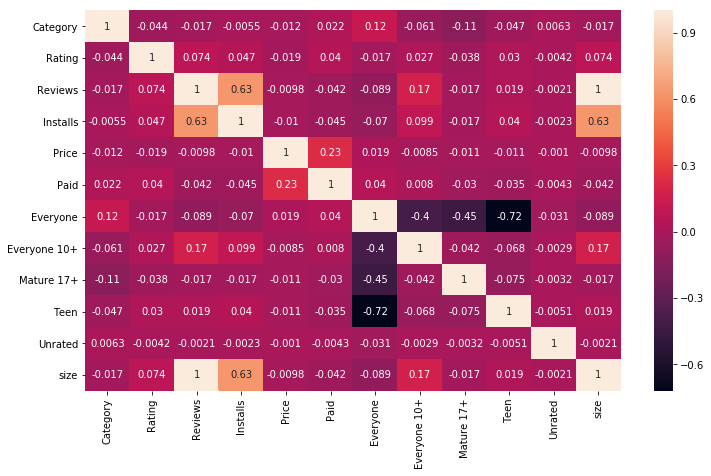

In [309]:
plt.figure(figsize=(12,7))
sns.heatmap(df_appsize_predict.corr(),annot=True)

In [310]:
def success(install):
    x=install
    if x<100000:
        return 0 
    else:
        return 1
        
        
df_appsize_predict['success'] = df_appsize_predict['Installs'].apply(success) 

In [311]:
df_appsize_predict = df_appsize_predict.drop('Installs',axis=1)
df_appsize_predict[1:20]

,Category,Rating,Reviews,Price,Paid,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,size,success
1,0,3.9,967,0.0,0,1,0,0,0,0,967.0,1
2,0,4.7,87510,0.0,0,1,0,0,0,0,87510.0,1
3,0,4.5,215644,0.0,0,0,0,0,1,0,215644.0,1
4,0,4.3,967,0.0,0,1,0,0,0,0,967.0,1
5,0,4.4,167,0.0,0,1,0,0,0,0,167.0,0
6,0,3.8,178,0.0,0,1,0,0,0,0,178.0,0
7,0,4.1,36815,0.0,0,1,0,0,0,0,36815.0,1
8,0,4.4,13791,0.0,0,1,0,0,0,0,13791.0,1
9,0,4.7,121,0.0,0,1,0,0,0,0,121.0,0
10,0,4.4,13880,0.0,0,1,0,0,0,0,13880.0,1


## Data preprocessing

In [312]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
sc = StandardScaler()
sc.fit(df_appsize_predict.drop('success',axis=1))
transform_data = sc.transform(df_appsize_predict.drop('success',axis=1))

C:\Users\Anshul\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.

C:\Users\Anshul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.



In [313]:
new_df = pd.DataFrame(transform_data,columns=df_appsize_predict.columns[:-1])

In [314]:
new_df.head()

,Category,Rating,Reviews,Price,Paid,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,size
0,-2.001672,-0.184900,-0.145031,-0.068244,-0.293216,0.482850,-0.194092,-0.215542,-0.34783,-0.01479,-0.145031
1,-2.001672,-0.582807,-0.144560,-0.068244,-0.293216,0.482850,-0.194092,-0.215542,-0.34783,-0.01479,-0.144560
2,-2.001672,1.008822,-0.094130,-0.068244,-0.293216,0.482850,-0.194092,-0.215542,-0.34783,-0.01479,-0.094130
3,-2.001672,0.610915,-0.019465,-0.068244,-0.293216,-2.071035,-0.194092,-0.215542,2.87497,-0.01479,-0.019465
4,-2.001672,0.213008,-0.144560,-0.068244,-0.293216,0.482850,-0.194092,-0.215542,-0.34783,-0.01479,-0.144560


In [315]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

## Predicting the app's success using Decision Tree Model

In [316]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = new_df.drop(['Rating','Reviews'],axis=1)
y =df_appsize_predict['success']

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [318]:
classifier = DecisionTreeClassifier(max_depth=1)

In [319]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [320]:
predict = classifier.predict(X_test)

In [321]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1370
           1       0.93      0.95      0.94      1374

   micro avg       0.94      0.94      0.94      2744
   macro avg       0.94      0.94      0.94      2744
weighted avg       0.94      0.94      0.94      2744



In [322]:
print("Averge cross validation score:",cross_val_score(classifier, X, y, cv=5).mean())
pd.DataFrame(data=cross_val_score(classifier, X, y, cv=5),columns=['cross_validation_score'])

Averge cross validation score: 0.9382188446488607


,cross_validation_score
0,0.907650
1,0.951913
2,0.960634
3,0.925055
4,0.945842


In [323]:
r2_score(y_test,predict)

0.7448974170996292

In [324]:
print("Train Accuracy:",classifier.score(X_train,y_train))
print("Test Accuracy:",classifier.score(X_test,y_test))

Train Accuracy: 0.9457897203561944
Test Accuracy: 0.9362244897959183


# that's it folks

## Consider above part only.Below section is for evaluation purpose.

In [286]:
test_data = df_appsize_predict[df_appsize_predict.isna().any(axis=1)]
test_data.head()

,Category,Rating,Reviews,Installs,Price,Paid,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,size
37,0,4.1,36639,5000000,0.0,0,1,0,0,0,0,NaN
42,0,4.4,295221,10000000,0.0,0,1,0,0,0,0,NaN
52,1,4.6,17057,1000000,0.0,0,1,0,0,0,0,NaN
67,1,4.3,40211,5000000,0.0,0,1,0,0,0,0,NaN
68,1,3.9,356,100000,0.0,0,1,0,0,0,0,NaN


In [239]:
import random

In [287]:
def fill(x):
    return random.randint(1000000,10000000)

test_data['size'] = test_data['size'].apply(fill)

In [326]:
test_data.head()

,Category,Rating,Reviews,Installs,Price,Paid,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,size,predict
37,0,4.1,36639,5000000,0.0,0,1,0,0,0,0,7999459,1
42,0,4.4,295221,10000000,0.0,0,1,0,0,0,0,2901515,1
52,1,4.6,17057,1000000,0.0,0,1,0,0,0,0,7416436,1
67,1,4.3,40211,5000000,0.0,0,1,0,0,0,0,6735429,1
68,1,3.9,356,100000,0.0,0,1,0,0,0,0,9254989,1


In [327]:
test_predict = classifier.predict(test_data.drop(['Rating','Reviews','Installs','predict'],axis=1))

In [328]:
test_data['predict'] = test_predict

In [330]:
test_data.iloc[:30]

,Category,Rating,Reviews,Installs,Price,Paid,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,size,predict
37,0,4.1,36639,5000000,0.0,0,1,0,0,0,0,7999459,1
42,0,4.4,295221,10000000,0.0,0,1,0,0,0,0,2901515,1
52,1,4.6,17057,1000000,0.0,0,1,0,0,0,0,7416436,1
67,1,4.3,40211,5000000,0.0,0,1,0,0,0,0,6735429,1
68,1,3.9,356,100000,0.0,0,1,0,0,0,0,9254989,1
73,1,4.8,736,100000,0.0,0,1,0,0,0,0,4666680,1
85,1,4.4,21777,1000000,0.0,0,1,0,0,0,0,7328873,1
88,1,4.6,13372,1000000,0.0,0,1,0,0,0,0,3012351,1
89,1,4.6,7880,100000,0.0,0,1,0,0,0,0,2454928,1
92,1,4.6,65786,1000000,0.0,0,1,0,0,0,0,8290907,1


In [337]:
test_data['predict'].nunique()

1

In [ ]:
# sns.set_style(style='whitegrid')
# plt.figure(figsize=(12,9))
# fig = plt.gcf()
# fig.set_size_inches(16.5, 8.5)
# sns.barplot(y='Installs',x='Category',data=df)
# plt.ticklabel_format(style='plain')
# plt.xticks(rotation=90)
# plt.tick_params(labelsize=9,which='major' )
# plt.tight_layout()